In [ ]:
#1. Setting Up the Environment


# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Enable plots inline for Colab
%matplotlib inline

# Load the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Preview the datasets
print("Customers Dataset:")
print(customers.head(), "\n")

print("Products Dataset:")
print(products.head(), "\n")

print("Transactions Dataset:")
print(transactions.head(), "\n")


Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166 

In [ ]:
#Data Cleaning and Preparation


# Check for missing values
print("Missing Values in Customers Dataset:\n", customers.isnull().sum())
print("\nMissing Values in Products Dataset:\n", products.isnull().sum())
print("\nMissing Values in Transactions Dataset:\n", transactions.isnull().sum())

# Remove duplicates if any
customers = customers.drop_duplicates()
products = products.drop_duplicates()
transactions = transactions.drop_duplicates()

# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Add additional columns for analysis
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
transactions['Year'] = transactions['TransactionDate'].dt.year


Missing Values in Customers Dataset:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products Dataset:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions Dataset:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


<ipython-input-4-304351f86e7e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")


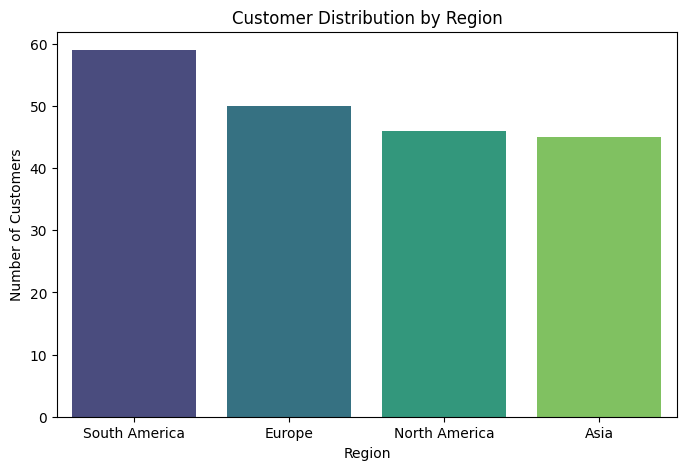

In [ ]:
#Insight 1: Customer Region Concentration


# Count customers by region
region_counts = customers['Region'].value_counts()

# Plot customer distribution by region
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()


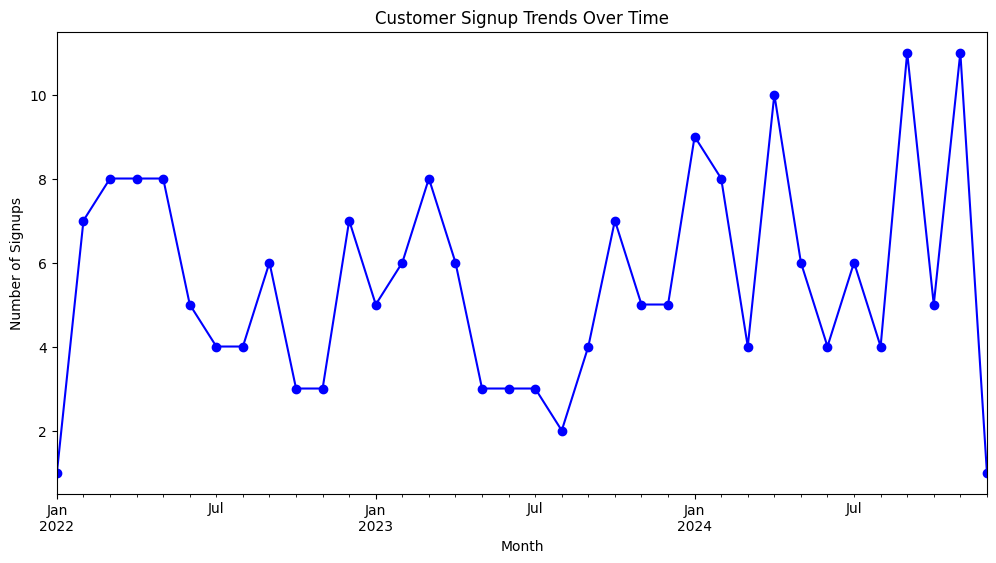

In [ ]:
#Insight 2: Signup Trends

# Analyze customer signups by month
signup_trends = customers['SignupDate'].dt.to_period('M').value_counts().sort_index()

# Plot signup trends
plt.figure(figsize=(12, 6))
signup_trends.plot(kind='line', marker='o', color='blue')
plt.title("Customer Signup Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Signups")
plt.show()


In [ ]:
#Insight 3: High-Value Customers

# Calculate total spend per customer
customer_spend = transactions.groupby('CustomerID')['TotalValue'].sum()

# Identify high-value customers (top 20% spenders)
threshold = customer_spend.quantile(0.8)
high_value_customers = customer_spend[customer_spend >= threshold]

print(f"Number of High-Value Customers: {len(high_value_customers)}")
print(high_value_customers)


Number of High-Value Customers: 40
CustomerID
C0004     5354.88
C0012     5231.26
C0013     6000.56
C0021     5419.92
C0023     5158.65
C0028     6819.57
C0041     6149.78
C0045     6021.80
C0046     5627.83
C0051     5699.57
C0053     5316.46
C0054     8040.39
C0059     7073.28
C0065     7663.70
C0068     5950.42
C0075     5848.97
C0082     7572.91
C0087     6604.23
C0093     5294.99
C0096     6072.92
C0099     6715.72
C0101     5550.99
C0102     6132.36
C0104     6579.10
C0109     5487.25
C0114     5780.43
C0122     5072.55
C0138     5610.25
C0141    10673.87
C0143     6044.63
C0145     5771.27
C0148     5457.79
C0155     5377.83
C0156     7634.45
C0163     5775.28
C0165     6708.10
C0171     5145.35
C0173     5808.04
C0175     6210.53
C0188     7111.32
Name: TotalValue, dtype: float64


<ipython-input-7-542817ce4cae>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette="magma")


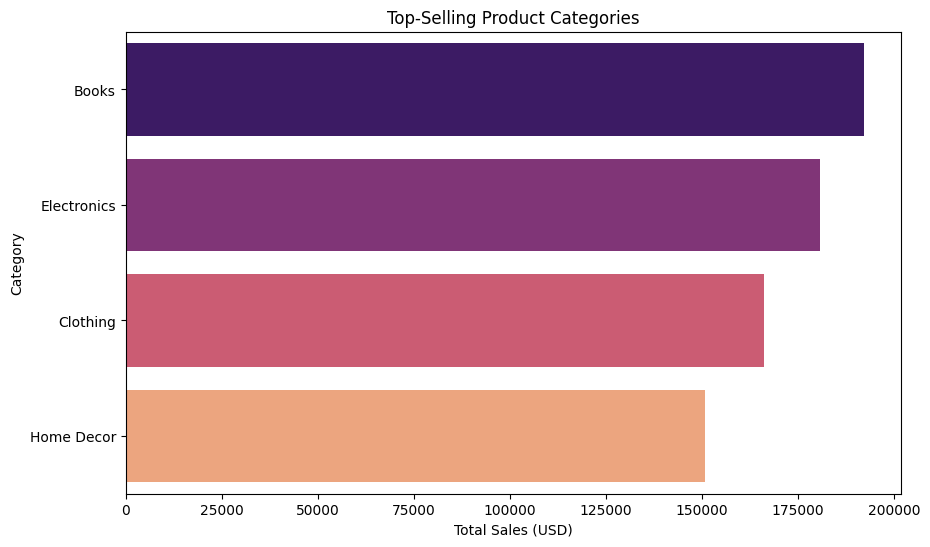

In [ ]:
#Insight 4: Top-Selling Product Categories

# Merge transactions with products to get category information
transactions = transactions.merge(products[['ProductID', 'Category']], on='ProductID')

# Calculate total sales per category
category_sales = transactions.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# Plot sales by category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.values, y=category_sales.index, palette="magma")
plt.title("Top-Selling Product Categories")
plt.xlabel("Total Sales (USD)")
plt.ylabel("Category")
plt.show()


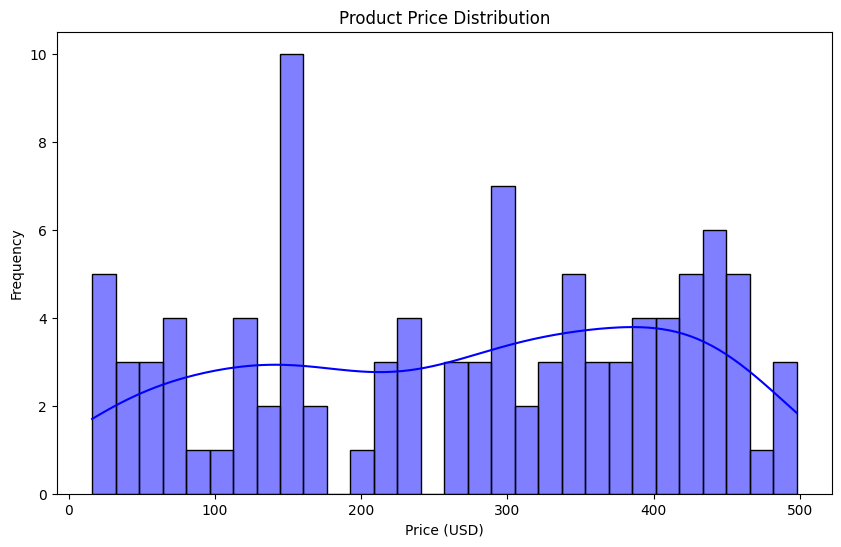

Price
(0, 20]         2
(20, 50]       11
(50, 100]      20
(100, 500]    203
Name: Quantity, dtype: int64


<ipython-input-8-36d9050995e4>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_sales = transactions.groupby(pd.cut(products['Price'], bins=[0, 20, 50, 100, 500]))['Quantity'].sum()


In [ ]:
#Insight 5: Product Price Elasticity


# Plot price distribution of products
plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], bins=30, kde=True, color='blue')
plt.title("Product Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

# Analyze sales volume by price range
price_sales = transactions.groupby(pd.cut(products['Price'], bins=[0, 20, 50, 100, 500]))['Quantity'].sum()
print(price_sales)


In [ ]:
#Insight 6: Unsold Products

# Identify unsold products
unsold_products = products[~products['ProductID'].isin(transactions['ProductID'])]
print(f"Number of Unsold Products: {len(unsold_products)}")
print(unsold_products)


Number of Unsold Products: 0
Empty DataFrame
Columns: [ProductID, ProductName, Category, Price]
Index: []


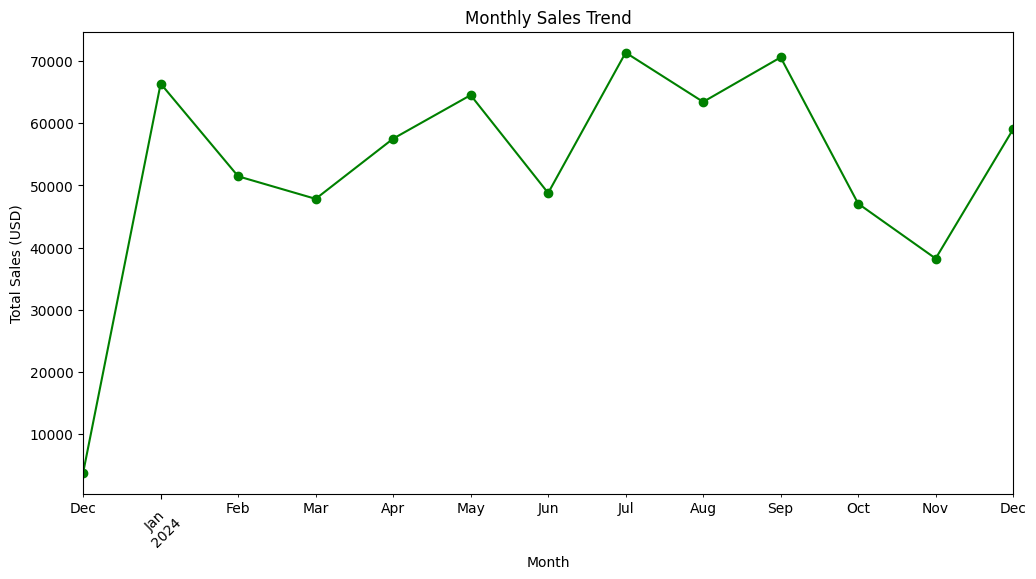

In [ ]:
#Insight 7: Peak Sales Period

# Aggregate total sales by month
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()

# Plot monthly sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Insight 8: Repeat Purchases

# Count transactions per customer
customer_transactions = transactions['CustomerID'].value_counts()

# Identify repeat customers (customers with more than 5 transactions)
repeat_customers = customer_transactions[customer_transactions > 5]

print(f"Number of Repeat Customers: {len(repeat_customers)}")
print(repeat_customers)


Number of Repeat Customers: 74
CustomerID
C0109    11
C0156    11
C0141    10
C0175    10
C0065    10
         ..
C0181     6
C0053     6
C0126     6
C0034     6
C0023     6
Name: count, Length: 74, dtype: int64


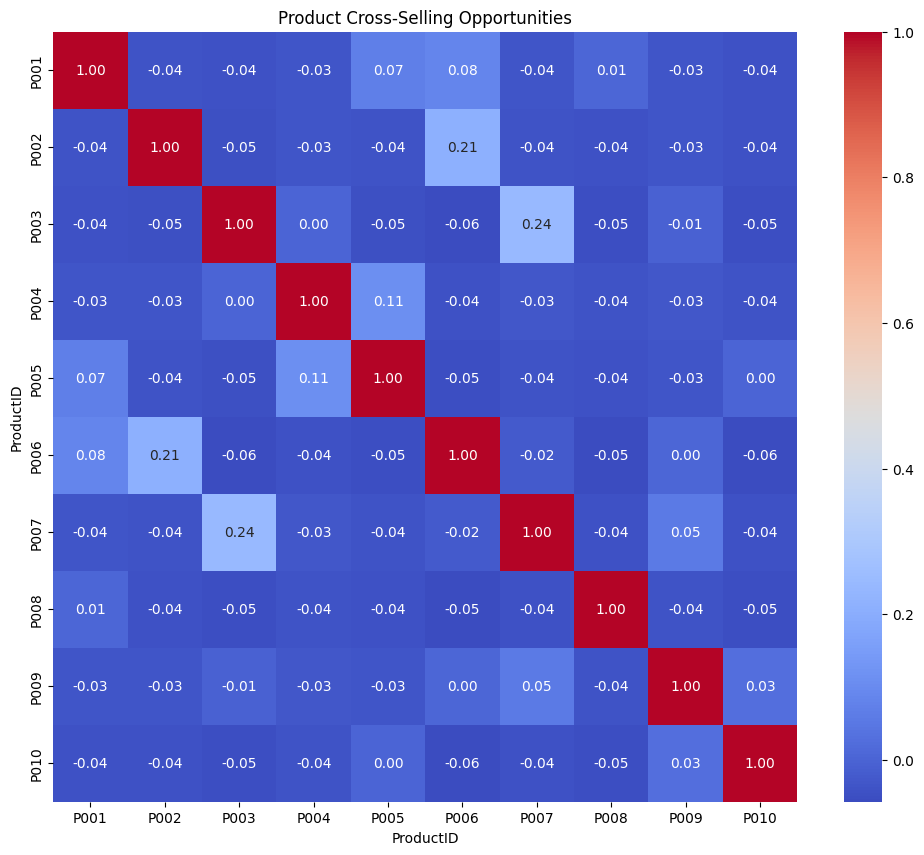

In [ ]:
#Insight 9: Cross-Selling Opportunities

# Analyze most frequently bought products together
# Create a pivot table for product and customer transactions
cross_sales = transactions.pivot_table(index='CustomerID', columns='ProductID', values='Quantity', aggfunc='sum').fillna(0)

# Calculate correlations between products
correlation_matrix = cross_sales.corr()

# Display heatmap of correlations (top 10 products)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix.iloc[:10, :10], cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Product Cross-Selling Opportunities")
plt.show()


In [ ]:
#Insight 10: Revenue from High-Quantity Transactions

# Filter high-quantity transactions
high_quantity_transactions = transactions[transactions['Quantity'] > 10]

# Calculate revenue from these transactions
high_quantity_revenue = high_quantity_transactions['TotalValue'].sum()
print(f"Total Revenue from High-Quantity Transactions: ${high_quantity_revenue:.2f}")


Total Revenue from High-Quantity Transactions: $0.00
